In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.neighbors import KNeighborsClassifier
sns.set()

In [2]:
df = pd.read_csv('titanicfull.csv')
df.drop(columns=['name', 'ticket', 'cabin'], inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S


## Exploratory data analysis (EDA)

## Target

In [3]:
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

## numeric vs target

<Figure size 504x432 with 0 Axes>

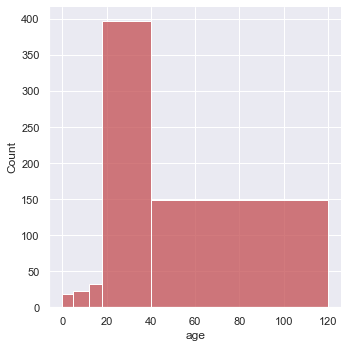

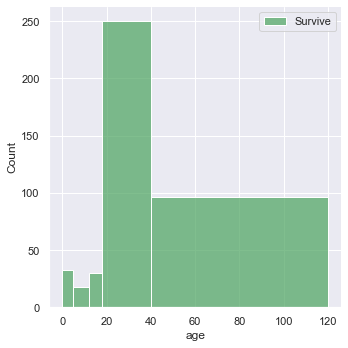

In [4]:
plt.figure(figsize=(7, 6))
sns.displot(df.age[df.survived == 0], bins=[0, 5, 12, 18, 40, 120], color='r', label='Not Survive')
sns.displot(df.age[df.survived == 1], bins=[0, 5, 12, 18, 40, 120], color='g', label='Survive')
plt.legend();

<Figure size 504x432 with 0 Axes>

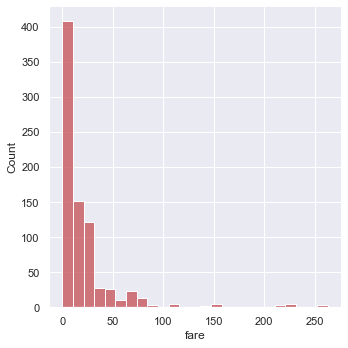

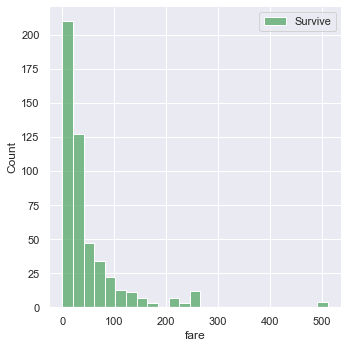

In [5]:
plt.figure(figsize=(7, 6))
sns.displot(df.fare[df.survived == 0], bins=25, color='r', label='not survive')
sns.displot(df.fare[df.survived == 1], bins=25, color='g', label='Survive')
plt.legend();

## categoric / ordinal vs Target

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

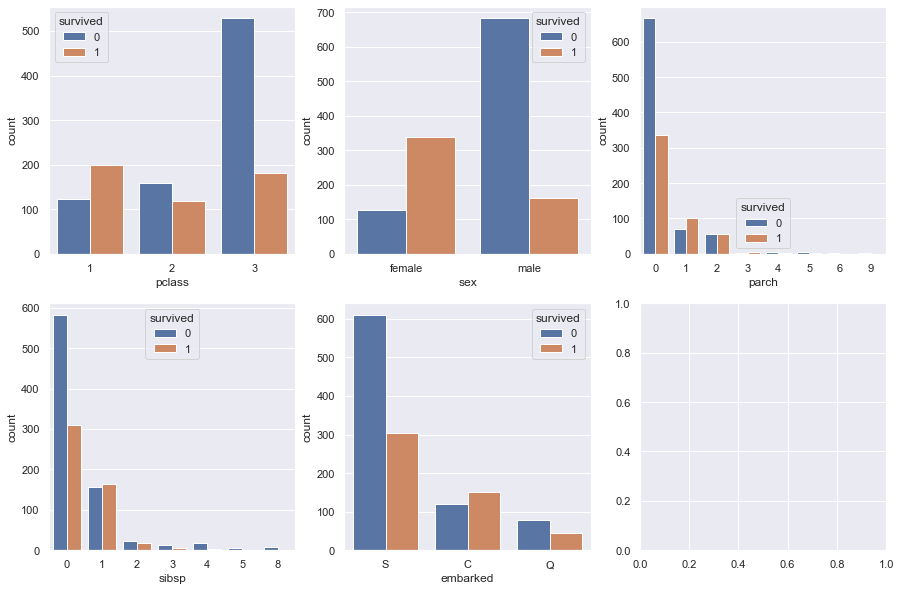

In [6]:
cat_var = ['pclass', 'sex', 'parch', 'sibsp', 'embarked']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue='survived', ax=ax)

## Pandas crosstab

In [7]:
pd.crosstab(df.pclass, df.survived, normalize="index")

survived,0,1
pclass,,
1,0.380805,0.619195
2,0.570397,0.429603
3,0.744711,0.255289


## Feature Engineering

In [8]:
df['isAlone'] = (df.sibsp == 0) & (df.parch == 0)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,isAlone
0,1,1,female,29.00,0,0,211.3375,S,True
1,1,1,male,0.92,1,2,151.5500,S,False
2,1,0,female,2.00,1,2,151.5500,S,False
3,1,0,male,30.00,1,2,151.5500,S,False
4,1,0,female,25.00,1,2,151.5500,S,False


In [9]:
df.age = pd.cut(df.age, [0, 5, 12, 18, 40, 120], labels=["balita", "anak-anak", "remaja", "dewasa", "lansia"])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,isAlone
0,1,1,female,dewasa,0,0,211.3375,S,True
1,1,1,male,balita,1,2,151.5500,S,False
2,1,0,female,balita,1,2,151.5500,S,False
3,1,0,male,dewasa,1,2,151.5500,S,False
4,1,0,female,dewasa,1,2,151.5500,S,False


In [10]:
df.fare = pd.cut(df.fare, [0, 25, 100, 600], labels=["murah", "mahal", "sangat mahal"])
df.head(20)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,isAlone
0,1,1,female,dewasa,0,0,sangat mahal,S,True
1,1,1,male,balita,1,2,sangat mahal,S,False
2,1,0,female,balita,1,2,sangat mahal,S,False
3,1,0,male,dewasa,1,2,sangat mahal,S,False
4,1,0,female,dewasa,1,2,sangat mahal,S,False
5,1,1,male,lansia,0,0,mahal,S,True
6,1,1,female,lansia,1,0,mahal,S,False
7,1,0,male,dewasa,0,0,NaN,S,True
8,1,1,female,lansia,2,0,mahal,S,False
9,1,0,male,lansia,0,0,mahal,C,True
